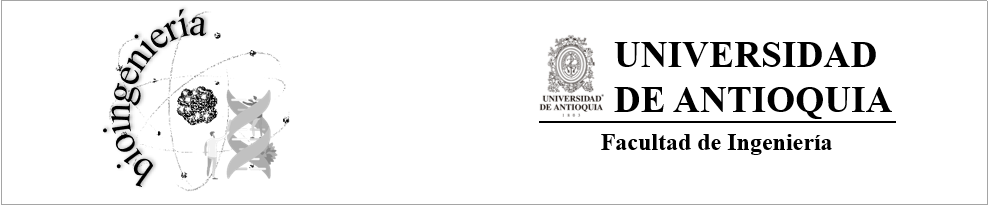

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/angelower/infomed20251/main/data/dataset.xlsx

--2025-05-29 12:16:08--  https://raw.githubusercontent.com/angelower/infomed20251/main/data/dataset.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30053 (29K) [application/octet-stream]
Saving to: ‘dataset.xlsx’

dataset.xlsx        100%[===================>]  29.35K  --.-KB/s    in 0.009s  

2025-05-29 12:16:09 (3.29 MB/s) - ‘dataset.xlsx’ saved [30053/30053]



In [33]:
df = pd.read_excel('dataset.xlsx')
df

,DESCRIPCION,Mes,Paciente Tipo Identificacion,Dx Principal Cod,Dx Relacionado1 Cod,Paciente Sexo,Clasificacion 1 Triaje,Ubicacion Urgencias,Modalidad Atencion,Estado de Ingreso
0,URGENCIAS ADULTO,ENERO,CC,I10X,NaN,FEMENINO,TRIAJE 2,XPRESS,URGENCIAS,moderado
1,URGENCIAS ADULTO,ENERO,CC,W540,NaN,FEMENINO,TRIAJE 3,OBSERVACION,URGENCIAS,leve
2,URGENCIAS ADULTO,ENERO,CC,G510,NaN,FEMENINO,TRIAJE 3,ALTA,URGENCIAS,Leve
3,URGENCIAS ADULTO,ENERO,CC,R224,NaN,MASCULINO,NO APLICA,XPRESS,REMITIDO,GRAVE
4,URGENCIAS ADULTO,ENERO,CC,K922,NaN,MASCULINO,TRIAJE 3,OBSERVACION,URGENCIAS,Moderado
...,...,...,...,...,...,...,...,...,...,...
494,URGENCIAS ADULTO,DICIEMBRE,CC,M255,NaN,FEMENINO,TRIAJE 3,OBSERVACION,URGENCIAS,grave
495,URGENCIAS ADULTO,DICIEMBRE,CC,R33X,K590,MASCULINO,TRIAJE 2,OBSERVACION,URGENCIAS,grave
496,URGENCIAS ADULTO,DICIEMBRE,CC,K810,NaN,FEMENINO,NO APLICA,XPRESS,REMITIDO,LEVE
497,URGENCIAS PEDIATRICAS,DICIEMBRE,TI,H578,NaN,FEMENINO,TRIAJE 3,OBSERVACION,URGENCIAS,GRAVE


## Análisis de los datos, qué tipo de variables son

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   DESCRIPCION                   499 non-null    object
 1   Mes                           499 non-null    object
 2   Paciente Tipo Identificacion  499 non-null    object
 3   Dx Principal Cod              499 non-null    object
 4   Dx Relacionado1 Cod           76 non-null     object
 5   Paciente Sexo                 499 non-null    object
 6   Clasificacion 1 Triaje        499 non-null    object
 7   Ubicacion  Urgencias          499 non-null    object
 8   Modalidad Atencion            499 non-null    object
 9   Estado de Ingreso             499 non-null    object
dtypes: object(10)
memory usage: 39.1+ KB


## Cuánto vacíos o nulos

In [35]:
df.isnull().sum()

DESCRIPCION                       0
Mes                               0
Paciente Tipo Identificacion      0
Dx Principal Cod                  0
Dx Relacionado1 Cod             423
Paciente Sexo                     0
Clasificacion 1 Triaje            0
Ubicacion  Urgencias              0
Modalidad Atencion                0
Estado de Ingreso                 0
dtype: int64

## Nombre de la columnas del DataFrame

In [16]:
df.columns

Index(['DESCRIPCION', 'Mes', 'Paciente Tipo Identificacion',
       'Dx Principal Cod', 'Dx Relacionado1 Cod', 'Paciente Sexo',
       'Clasificacion 1 Triaje ', 'Ubicacion  Urgencias', 'Modalidad Atencion',
       'Estado de Ingreso'],
      dtype='object')

In [17]:
# Se pueden cambiar los nombre del DataFrame
df.DESCRIPCION.value_counts()

DESCRIPCION
URGENCIAS ADULTO         428
URGENCIAS PEDIATRICAS     71
Name: count, dtype: int64

In [15]:
df['DESCRIPCION'].value_counts()

DESCRIPCION
URGENCIAS ADULTO         428
URGENCIAS PEDIATRICAS     71
Name: count, dtype: int64

### Variable $DESCRIPCION$

In [14]:
df.DESCRIPCION.value_counts()

DESCRIPCION
URGENCIAS ADULTO         428
URGENCIAS PEDIATRICAS     71
Name: count, dtype: int64

### Variable $Mes$

In [13]:
df.Mes.value_counts()

Mes
MAYO          57
AGOSTO        48
NOVIEMBRE     46
JUNIO         46
JULIO         46
SEPTIEMBRE    42
DICIEMBRE     39
ABRIL         38
ENERO         34
FEBRERO       33
MARZO         33
OCTUBRE       31
septiembre     1
Octubre        1
Agostos        1
noviembre      1
Diciembre      1
diciembre      1
Name: count, dtype: int64

### Variable $Paciente\_Tipo\_Identificacion$

In [19]:
df['Paciente Tipo Identificacion'].value_counts()

Paciente Tipo Identificacion
CC    418
RC     44
TI     28
PE      3
AS      2
PA      1
PT      1
CN      1
CE      1
Name: count, dtype: int64

### Variable $Dx\_Principal\_Cod$

In [21]:
df['Dx Principal Cod'].value_counts()

Dx Principal Cod
R104    28
J441    19
R074    13
N390    13
J22X    12
        ..
R600     1
S118     1
R739     1
L089     1
S623     1
Name: count, Length: 225, dtype: int64

<Axes: xlabel='Dx Principal Cod'>

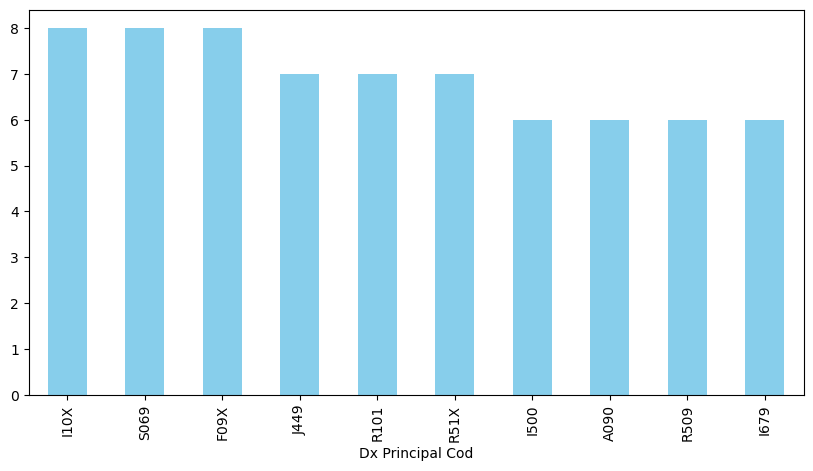

In [24]:
# Se puede ver en una gráfica
dx = df['Dx Principal Cod'].value_counts()[10:20]
plt.figure(figsize=(10, 5))
dx.plot(kind='bar', figsize=(10, 5), color='skyblue')



### Variable $Dx\_Relacionado1\_Cod$

In [26]:
df['Dx Relacionado1 Cod'].value_counts()

Dx Relacionado1 Cod
R11X    4
R51X    3
I509    2
S900    2
R42X    2
       ..
S626    1
M868    1
R074    1
R55X    1
K590    1
Name: count, Length: 63, dtype: int64

### Variable $Paciente\_Sexo$

In [28]:
df['Paciente Sexo'].value_counts()

Paciente Sexo
FEMENINO     272
MASCULINO    227
Name: count, dtype: int64

### Variable $Clasificacion\_1\_Triaje\_Enfermeria$

In [38]:
df['Clasificacion 1 Triaje '].value_counts()

Clasificacion 1 Triaje 
TRIAJE 3     292
TRIAJE 2     138
NO APLICA     62
TRIAJE 1       3
TRIAJE 4       3
TRIAJE 5       1
Name: count, dtype: int64

### Variable $Ubicacion\_Urgencias$

In [ ]:
df['Ubicacion_Urgencias'].value_counts()

### Variable $Modalidad\_Atencion$

In [ ]:
df['Modalidad_Atencion'].value_counts()

In [ ]:
df['Estado_de_Ingresos'].value_counts()

In [42]:
def ConvMax(x):
    return x.upper()

df.Mes = df.Mes.apply(ConvMax)

In [43]:
df.Mes.value_counts()

Mes
MAYO          57
AGOSTO        48
NOVIEMBRE     47
JUNIO         46
JULIO         46
SEPTIEMBRE    43
DICIEMBRE     41
ABRIL         38
ENERO         34
FEBRERO       33
MARZO         33
OCTUBRE       32
AGOSTOS        1
Name: count, dtype: int64

In [46]:
df.Mes.replace({'AGOSTO': 'AGOSTOS'}, inplace=True)
df.Mes.value_counts()

Mes
MAYO          57
AGOSTOS       49
NOVIEMBRE     47
JUNIO         46
JULIO         46
SEPTIEMBRE    43
DICIEMBRE     41
ABRIL         38
ENERO         34
FEBRERO       33
MARZO         33
OCTUBRE       32
Name: count, dtype: int64

# CODIFICACIONES

### 1) One-Hot Encoding - OHE

La **codificación one-hot** es una de las técnicas más utilizadas para transformar variables categóricas en un formato numérico adecuado para el análisis de datos y el aprendizaje automático. **Consiste en crear variables binarias para cada categoría presente en una variable categórica**, donde un valor de 1 indica la presencia de esa categoría y un valor de 0 indica su ausencia.

El uso de la codificación one-hot es especialmente **útil cuando no hay un orden inherente en las categorías y todas las categorías son igualmente importantes**. Esto es común en variables categóricas como el género, el estado civil, la región geográfica, entre otros.

#### OHE en Dx principal

In [49]:
# Aplicar la codificación OHE en el Dx Ppal
df_dxp = pd.get_dummies(df['Dx Principal Cod'], prefix_sep='_', dtype=int)

# Imprimir el dataframe codificado
print(df_dxp)

     A084  A090  A099  A419  B227  B349  B451  C099  C349  C412  ...  T818  \
0       0     0     0     0     0     0     0     0     0     0  ...     0   
1       0     0     0     0     0     0     0     0     0     0  ...     0   
2       0     0     0     0     0     0     0     0     0     0  ...     0   
3       0     0     0     0     0     0     0     0     0     0  ...     0   
4       0     0     0     0     0     0     0     0     0     0  ...     0   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
494     0     0     0     0     0     0     0     0     0     0  ...     0   
495     0     0     0     0     0     0     0     0     0     0  ...     0   
496     0     0     0     0     0     0     0     0     0     0  ...     0   
497     0     0     0     0     0     0     0     0     0     0  ...     0   
498     0     0     0     0     0     0     0     0     0     0  ...     0   

     T888  T889  W540  Y442  Y841  Z000  Z203  Z492  Z988  
0  

In [ ]:
df.loc[2, :]  # Ver la fila 1 completa

DESCRIPCION                     URGENCIAS ADULTO
Mes                                        ENERO
Paciente Tipo Identificacion                  CC
Dx Principal Cod                            G510
Dx Relacionado1 Cod                          NaN
Paciente Sexo                           FEMENINO
Clasificacion 1 Triaje                  TRIAJE 3
Ubicacion  Urgencias                        ALTA
Modalidad Atencion                     URGENCIAS
Estado de Ingreso                           Leve
Name: 2, dtype: object

In [ ]:
df_dxp.loc[2, df['']]  # Ver la fila 1 completa del Dx Ppal codificado

A084    0
A090    0
A099    0
A419    0
B227    0
       ..
Y841    0
Z000    0
Z203    0
Z492    0
Z988    0
Name: 2, Length: 225, dtype: int64

#### OHE para Paciente_Tipo_Identificacion

In [54]:
# Aplicar la codificación OHE en el Tipo de identificación
df_tipo_id = pd.get_dummies(df['Paciente Tipo Identificacion'], prefix_sep='_', dtype=int)

# Imprimir el dataframe codificado
print(df_tipo_id)

     AS  CC  CE  CN  PA  PE  PT  RC  TI
0     0   1   0   0   0   0   0   0   0
1     0   1   0   0   0   0   0   0   0
2     0   1   0   0   0   0   0   0   0
3     0   1   0   0   0   0   0   0   0
4     0   1   0   0   0   0   0   0   0
..   ..  ..  ..  ..  ..  ..  ..  ..  ..
494   0   1   0   0   0   0   0   0   0
495   0   1   0   0   0   0   0   0   0
496   0   1   0   0   0   0   0   0   0
497   0   0   0   0   0   0   0   0   1
498   0   1   0   0   0   0   0   0   0

[499 rows x 9 columns]


In [55]:
# Aplicar la codificación OHE en la variable DESCRIPCIÓN
df_tipo_id = pd.get_dummies(df.DESCRIPCION, prefix_sep='_', dtype=int)

# Imprimir el dataframe codificado
print(df_tipo_id)

     URGENCIAS ADULTO  URGENCIAS PEDIATRICAS
0                   1                      0
1                   1                      0
2                   1                      0
3                   1                      0
4                   1                      0
..                ...                    ...
494                 1                      0
495                 1                      0
496                 1                      0
497                 0                      1
498                 1                      0

[499 rows x 2 columns]


### 2) Codificación ordinal

La **codificación ordinal** es una técnica utilizada para convertir variables categóricas en valores numéricos ordinales, es decir, valores que mantienen el orden y la jerarquía entre las categorías. A diferencia de la codificación de enteros, donde los valores numéricos pueden ser arbitrarios, la codificación ordinal **asigna valores numéricos que reflejan la relación de orden entre las categorías**.

La codificación ordinal **es apropiada cuando existe un orden o una jerarquía natural entre las categorías y queremos preservar esta información en el formato numérico**. Por ejemplo, si estamos trabajando con datos que contienen calificaciones de desempeño, como “bajo”, “medio” y “alto”, donde hay un orden lógico, la codificación ordinal puede ser una opción adecuada.

In [61]:
# Definir el orden de las categorías
orden = ['leve', 'moderado', 'grave']

# Aplicar la codificación ordinal
df_id_ordinal = df['Estado de Ingreso'].map({cat: idx for idx, cat in enumerate(orden)})

# Imprimir el dataframe codificado
print(df_id_ordinal)

0      1.0
1      0.0
2      NaN
3      NaN
4      NaN
      ... 
494    2.0
495    2.0
496    NaN
497    NaN
498    NaN
Name: Estado de Ingreso, Length: 499, dtype: float64


In [59]:
df.columns

Index(['DESCRIPCION', 'Mes', 'Paciente Tipo Identificacion',
       'Dx Principal Cod', 'Dx Relacionado1 Cod', 'Paciente Sexo',
       'Clasificacion 1 Triaje ', 'Ubicacion  Urgencias', 'Modalidad Atencion',
       'Estado de Ingreso'],
      dtype='object')

### 3) Codificación de enteros
La **codificación de enteros** es una técnica utilizada para convertir variables categóricas en valores numéricos enteros. A diferencia de la codificación ordinal, la codificación de enteros no implica establecer un orden o jerarquía específica entre las categorías. En cambio, **asigna valores numéricos de manera arbitraria a cada categoría**.

La codificación de enteros **es útil cuando no hay una relación de jerarquía o algún tipo de ordenamiento natural entre las categorías**. Es adecuada para variables categóricas que representan características o atributos sin una relación intrínseca de orden, como **colores, marcas de automóviles o tipos de alimentos**.

#### ** Asignación aleatoria de los número enteros

In [63]:
df.Mes

0          ENERO
1          ENERO
2          ENERO
3          ENERO
4          ENERO
         ...    
494    DICIEMBRE
495    DICIEMBRE
496    DICIEMBRE
497    DICIEMBRE
498    DICIEMBRE
Name: Mes, Length: 499, dtype: object

In [62]:
# Aplicar la codificación de enteros
df_entero_mes = df.Mes.astype('category').cat.codes

# Imprimir el dataframe codificado
print(df_entero_mes)

0      3
1      3
2      3
3      3
4      3
      ..
494    2
495    2
496    2
497    2
498    2
Length: 499, dtype: int8


#### ** Asignación manual de los número enteros

In [64]:
mes_ ={'ABRIL':4, 'AGOSTO':8, 'DICIEMBRE':12,'ENERO':1,
       'FEBRERO':2, 'JULIO':7, 'JUNIO':6, 'MARZO':3, 'MAYO':5, 'NOVIEMBRE':11,
       'OCTUBRE':10, 'SEPTIEMBRE':9}
df_entero_mes_ = df.Mes.map(mes_)
df_entero_mes_

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
494    12.0
495    12.0
496    12.0
497    12.0
498    12.0
Name: Mes, Length: 499, dtype: float64

In [65]:
df.Mes.value_counts()

Mes
MAYO          57
AGOSTOS       49
NOVIEMBRE     47
JUNIO         46
JULIO         46
SEPTIEMBRE    43
DICIEMBRE     41
ABRIL         38
ENERO         34
FEBRERO       33
MARZO         33
OCTUBRE       32
Name: count, dtype: int64

### 4) Codificación de frecuencia
Esta técnica **asigna valores numéricos más altos a las categorías que aparecen con mayor frecuencia y valores numéricos más bajos a las categorías menos frecuentes**.

La codificación de frecuencia es **útil cuando queremos capturar la información sobre la prevalencia o importancia relativa de cada categoría en nuestros datos**.

In [69]:
# Calcular la frecuencia de cada categoría
frecuencia = df['Ubicacion  Urgencias'].value_counts()

# Aplicar la codificación de frecuencia
df_frec_ubi = df['Ubicacion  Urgencias'].map(frecuencia)

# Imprimir el dataframe codificado
print(df_frec_ubi)

0      147
1      313
2       36
3      147
4      313
      ... 
494    313
495    313
496    147
497    313
498    313
Name: Ubicacion  Urgencias, Length: 499, dtype: int64


In [66]:
df.columns

Index(['DESCRIPCION', 'Mes', 'Paciente Tipo Identificacion',
       'Dx Principal Cod', 'Dx Relacionado1 Cod', 'Paciente Sexo',
       'Clasificacion 1 Triaje ', 'Ubicacion  Urgencias', 'Modalidad Atencion',
       'Estado de Ingreso'],
      dtype='object')

### 5) Codificación binaria

Asigna un 1 o un 0 a la categoría que se asigne, no tiene implicaciones jeráquicas. Se usa en variables que solo tienen dos categorías, por ejemplo, sexo.

In [71]:
# se selecciona cual etiqueta va a tener el 0 y cual el 1 y se mapea la columna.
df_bin_sexo = df['Paciente Sexo'].map({'FEMENINO':0 , 'MASCULINO':1})
df_bin_sexo

0      0
1      0
2      0
3      1
4      1
      ..
494    0
495    1
496    0
497    0
498    1
Name: Paciente Sexo, Length: 499, dtype: int64

In [72]:
df

,DESCRIPCION,Mes,Paciente Tipo Identificacion,Dx Principal Cod,Dx Relacionado1 Cod,Paciente Sexo,Clasificacion 1 Triaje,Ubicacion Urgencias,Modalidad Atencion,Estado de Ingreso
0,URGENCIAS ADULTO,ENERO,CC,I10X,NaN,FEMENINO,TRIAJE 2,XPRESS,URGENCIAS,moderado
1,URGENCIAS ADULTO,ENERO,CC,W540,NaN,FEMENINO,TRIAJE 3,OBSERVACION,URGENCIAS,leve
2,URGENCIAS ADULTO,ENERO,CC,G510,NaN,FEMENINO,TRIAJE 3,ALTA,URGENCIAS,Leve
3,URGENCIAS ADULTO,ENERO,CC,R224,NaN,MASCULINO,NO APLICA,XPRESS,REMITIDO,GRAVE
4,URGENCIAS ADULTO,ENERO,CC,K922,NaN,MASCULINO,TRIAJE 3,OBSERVACION,URGENCIAS,Moderado
...,...,...,...,...,...,...,...,...,...,...
494,URGENCIAS ADULTO,DICIEMBRE,CC,M255,NaN,FEMENINO,TRIAJE 3,OBSERVACION,URGENCIAS,grave
495,URGENCIAS ADULTO,DICIEMBRE,CC,R33X,K590,MASCULINO,TRIAJE 2,OBSERVACION,URGENCIAS,grave
496,URGENCIAS ADULTO,DICIEMBRE,CC,K810,NaN,FEMENINO,NO APLICA,XPRESS,REMITIDO,LEVE
497,URGENCIAS PEDIATRICAS,DICIEMBRE,TI,H578,NaN,FEMENINO,TRIAJE 3,OBSERVACION,URGENCIAS,GRAVE
